In [1]:
import scanpy as sc
import pycisTopic
from pycisTopic.cistopic_class import *
import pickle
import os
import anndata
import mudata
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pyvis.network import Network


/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/pycisTopic/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
cellltype = 'PFC_PFC_Glut'
ctname = 'PFC_Glut'

In [3]:
oudir = f'/data1st2/junyi/output/atac0416/scenic/{cellltype}/Snakemake'

In [4]:
scplus_mdata = mudata.read(f'{oudir}/scplusmdata.h5mu')


/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/junyichen/anaconda3/envs/scenicplus/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [5]:
scplus_mdata.uns["direct_e_regulon_metadata"].sort_values(['importance_TF2G'])

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
39197,chr16:43698630-43699131,Zbtb20,0.074798,0.244997,0.018325,0.018325,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.071751,-1,-0.145179,15057
39198,chr5:90033080-90033581,Adamts3,0.052621,0.713176,0.037528,0.037528,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.073460,-1,-0.206777,25160
39200,chr5:90027366-90027867,Adamts3,0.112670,0.734727,0.082782,0.082782,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.073460,-1,-0.206777,2894
39194,chr1:189787061-189787562,Ptpn14,0.111917,0.324610,0.036329,0.036329,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.076761,-1,-0.107281,4538
39188,chr17:7259075-7259576,Rps6ka2,0.095524,0.586563,0.056031,0.056031,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.081059,-1,-0.283906,4984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12361,chr19:27906913-27907414,Rfx3,0.015624,0.661883,0.010341,0.010341,Rfx3,False,Rfx3_direct_+/+,Rfx3_direct_+/+_(1219g),Rfx3_direct_+/+_(1662r),29.356753,1,1.000000,61
2914,chr13:92053686-92054187,Rasgrf2,0.002507,0.623644,0.001564,0.001564,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),31.811152,1,0.771546,71
2729,chr13:91915643-91916144,Rasgrf2,0.084617,0.775719,0.065639,0.065639,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),31.811152,1,0.771546,6
2973,chr19:28436358-28436859,Glis3,0.000841,0.542315,0.000456,0.000456,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),31.811162,1,1.000000,21


In [6]:
cac_gene_dict = {'α1 subunit': ['Cacna1a',
  'Cacna1b',
  'Cacna1c',
  'Cacna1d',
  'Cacna1e',
  'Cacna1g',
  'Cacna1h',
  'Cacna1i'],
 'α2δ subunit': ['Cacna2d1', 'Cacna2d2', 'Cacna2d3', 'Cacna2d4'],
 'β subunit': ['Cacnb1', 'Cacnb2', 'Cacnb3', 'Cacnb4'],
 'γ subunit': ['Cacng2', 'Cacng3', 'Cacng4', 'Cacng5', 'Cacng7', 'Cacng8'],
 'None': ['Cacfd1', 'Cachd1']}

ca_genes = ['Cacna1a', 'Cacna1b', 'Cacna1c', 'Cacna1d', 'Cacna1e', 'Cacna1g', 
            'Cacna1h', 'Cacna1i', 'Cacna2d1', 'Cacna2d2', 'Cacna2d3', 'Cacna2d4', 
            'Cacnb1', 'Cacnb2', 'Cacnb3', 'Cacnb4', 'Cacng2', 'Cacng3', 'Cacng4', 
            'Cacng5', 'Cacng7', 'Cacng8', 'Cacfd1', 'Cachd1']


ligand = ['Slc18a2', 'Slc18a1', 'Ddc', 'Th', 'Slc17a7', 'Slc17a8', 'Gls',
       'Slc17a6', 'Slc18a3', 'Chat', 'Slc32a1', 'Dbh', 'Tph2', 'Tph1', 'Gad2',
       'Gad1', 'Pnmt', 'Shmt2', 'Shmt1', 'Hmox2', 'Nos3', 'Hmox1', 'Cort',
       'Nos2', 'Nos1', 'Sst', 'Adcyap1', 'Rln1', 'Nrxn3', 'Npy', 'Nrxn2',
       'Nrxn1', 'Pdyn', 'Vip', 'Trh', 'Crh', 'Nts', 'Penk', 'Tac1', 'Pthlh',
       'Pnoc', 'Tac2', 'Gjc1', 'Gjc2', 'Gjc3', 'Gjd2', 'Gjd3', 'Gjd4', 'Gje1',
       'Gjb6', 'Gjb5', 'Gjb4', 'Gjb3', 'Gjb2', 'Gjb1', 'Gja8', 'Gja6', 'Cck',
       'Grp', 'Gja5', 'Gja4', 'Gja1', 'Gja3', 'Gja10', 'Nmb']

receptor = ['Oprl1', 'Gabra6', 'Grik3', 'Gabrb3', 'Grik5', 'Adrb1', 'Oprd1', 'Gabra4', 
            'Grm5', 'Drd4', 'Npy1r', 'Grin2c', 'Slc6a4', 'Gjc3', 'Chrna7', 'Rxfp1', 'Adra1b', 
            'Gjb1', 'Oprm1', 'Nlgn2', 'Drd5', 'Chrm5', 'Gabra1', 'Htr5a', 'Pth1r', 'Oprk1', 'Tacr3', 
            'Chrna1', 'Grm7', 'Grik2', 'Chrna6', 'Adra1a', 'Gucy1b2', 'Slc6a3', 'Adra2b', 'Gabbr1', 'Chrna4', 
            'Gjb4', 'Htr1b', 'Gja1', 'Npy2r', 'Gucy1a1', 'Gabrb1', 'Grin1', 'Adra2a', 'Tacr1', 'Adrb2', 'Sstr2', 
            'Grin3a', 'Glra2', 'Slc6a2', 'Drd3', 'Htr1d', 'Adra2c', 'Htr2c', 'Grin2d', 'Chrnb1', 'Chrnb2', 'Gja4', 'Htr7', 
            'Htr2b', 'Gabra3', 'Ache', 'Grik4', 'Htr6', 'Grm1', 'Sstr4', 'Gjb2', 'Grm6', 'Adcyap1r1', 'Adra1d', 'Gria2', 
            'Chrna2', 'Grm3', 'Grik1', 'Chrm3', 'Rxfp3', 'Chrna10', 'Chrng', 'Gjb3', 'Crhr2', 'Grin3b', 'Gria3', 'Vipr1', 'Gria1', 
            'Grin2b', 'Htr4', 'Slc6a9', 'Npy5r', 'Gja3', 'Htr1f', 'Chrnb3', 'Gjd4', 'Nlgn3', 'Gjd2', 'Grm4', 'Sstr1', 'Grin2a', 'Gabrg2', 
            'Adrb3', 'Grm2', 'Gja8', 'Glra3', 'Gje1', 'Comt', 'Sstr3', 'Gjb5', 'Gabra2', 'Rxfp2', 'Chrne', 'Gabrg3', 'Vipr2', 'Cckbr', 'Htr1a', 
            'Chrm2', 'Gucy1a2', 'Htr2a', 'Ntsr2', 'Ntsr1', 'Htr3b', 'Gabrb2', 'Gja6', 'Drd2', 'Glra1', 'Grm8', 'Chrnd', 'Nmbr', 'Glrb', 'Trhr', 
            'Gria4', 'Gja5', 'Chrna9', 'Gucy1b1', 'Nlgn1', 'Drd1', 'Gjc1', 'Glra4', 'Crhr1', 'Chrna5', 'Gjc2', 'Gjd3', 'Trhr2', 'Gabra5', 'Htr1e', 
            'Htr3a', 'Slc6a5', 'Gja10', 'Chrna3', 'Chrm4', 'Gjb6', 'Chrnb4', 'Chrm1', 'Gabrg1', 'Gabbr2', 'Grpr']


respriotory = ['mt-Co1', 'mt-Co2', 'mt-Co3', 'mt-Atp6', 'mt-Nd4', 'mt-Nd1', 'Cox6c',
       'Cox8a', 'Cox4i1', 'Sdha', 'Ndufa4', 'Ndufs4', 'Cox7c', 'Ndufc2',
       'Ndufaf7', 'Ndufa13', 'Atp5f1', 'Ndufaf4', 'Cox7a2', 'Cox7b', 'Cox6a1',
       'Ndufs1', 'Ndufv2', 'Ndufb5', 'Uqcrh', 'Uqcrc2', 'Ndufaf2', 'Ndufb9',
       'Cox5a', 'Ndufa10', 'Ndufb1-ps', 'mt-Nd2', 'Ndufa6', 'Cox5b', 'Ndufb11',
       'Ndufb3', 'Cox6b1', 'Ndufs3', 'Uqcrq', 'Cyc1', 'Ndufb4', 'Coq2', 'Sdhb',
       'Ndufa7', 'Ndufs7', 'Ndufa12', 'Ndufb8', 'Ndufa11', 'Ndufb10', 'Ndufa3',
       'Coa3', 'Uqcrb', 'Ndufab1', 'Ndufa5', 'Uqcrc1', 'Sod2', 'Uqcr11',
       'Uqcr10', 'Sdhc', 'Ndufb2', 'Ndufa2', 'Ndufv3', 'Ndufs2', 'Ndufa1',
       'Ndufb7', 'Cycs', 'Ndufv1', 'Ndufa8', 'Coq3', 'Ndufc1', 'Ndufa9',
       'Coq5', 'Ndufb6', 'Coq8b', 'Ndufs8', 'Ndufaf5', 'Coq9', 'Ndufaf6',
       'Ndufs6', 'Tfam', 'mt-Nd3', 'mt-Nd5', 'Coq4', 'Sdhd', 'Coq7', 'Ndufaf3',
       'mt-Nd4l', 'Coa5', 'Coa7', 'Cox6a2', 'Cox4i2']

In [7]:
direct_er = scplus_mdata.uns["direct_e_regulon_metadata"]


In [10]:
direct_er.sort_values(['importance_TF2G'], ascending=False, inplace=True)
direct_er

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
2778,chr19:28332866-28333367,Glis3,0.021414,0.726319,0.015554,0.015554,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),31.811162,1,1.000000,18
2973,chr19:28436358-28436859,Glis3,0.000841,0.542315,0.000456,0.000456,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),31.811162,1,1.000000,21
2729,chr13:91915643-91916144,Rasgrf2,0.084617,0.775719,0.065639,0.065639,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),31.811152,1,0.771546,6
2914,chr13:92053686-92054187,Rasgrf2,0.002507,0.623644,0.001564,0.001564,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),31.811152,1,0.771546,71
13841,chr19:27694411-27694912,Rfx3,0.003144,0.360737,0.001134,0.001134,Rfx3,False,Rfx3_direct_+/+,Rfx3_direct_+/+_(1219g),Rfx3_direct_+/+_(1662r),29.356753,1,1.000000,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39188,chr17:7259075-7259576,Rps6ka2,0.095524,0.586563,0.056031,0.056031,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.081059,-1,-0.283906,4984
39194,chr1:189787061-189787562,Ptpn14,0.111917,0.324610,0.036329,0.036329,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.076761,-1,-0.107281,4538
39198,chr5:90033080-90033581,Adamts3,0.052621,0.713176,0.037528,0.037528,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.073460,-1,-0.206777,25160
39200,chr5:90027366-90027867,Adamts3,0.112670,0.734727,0.082782,0.082782,Ovol2,False,Ovol2_direct_-/+,Ovol2_direct_-/+_(17g),Ovol2_direct_-/+_(18r),0.073460,-1,-0.206777,2894


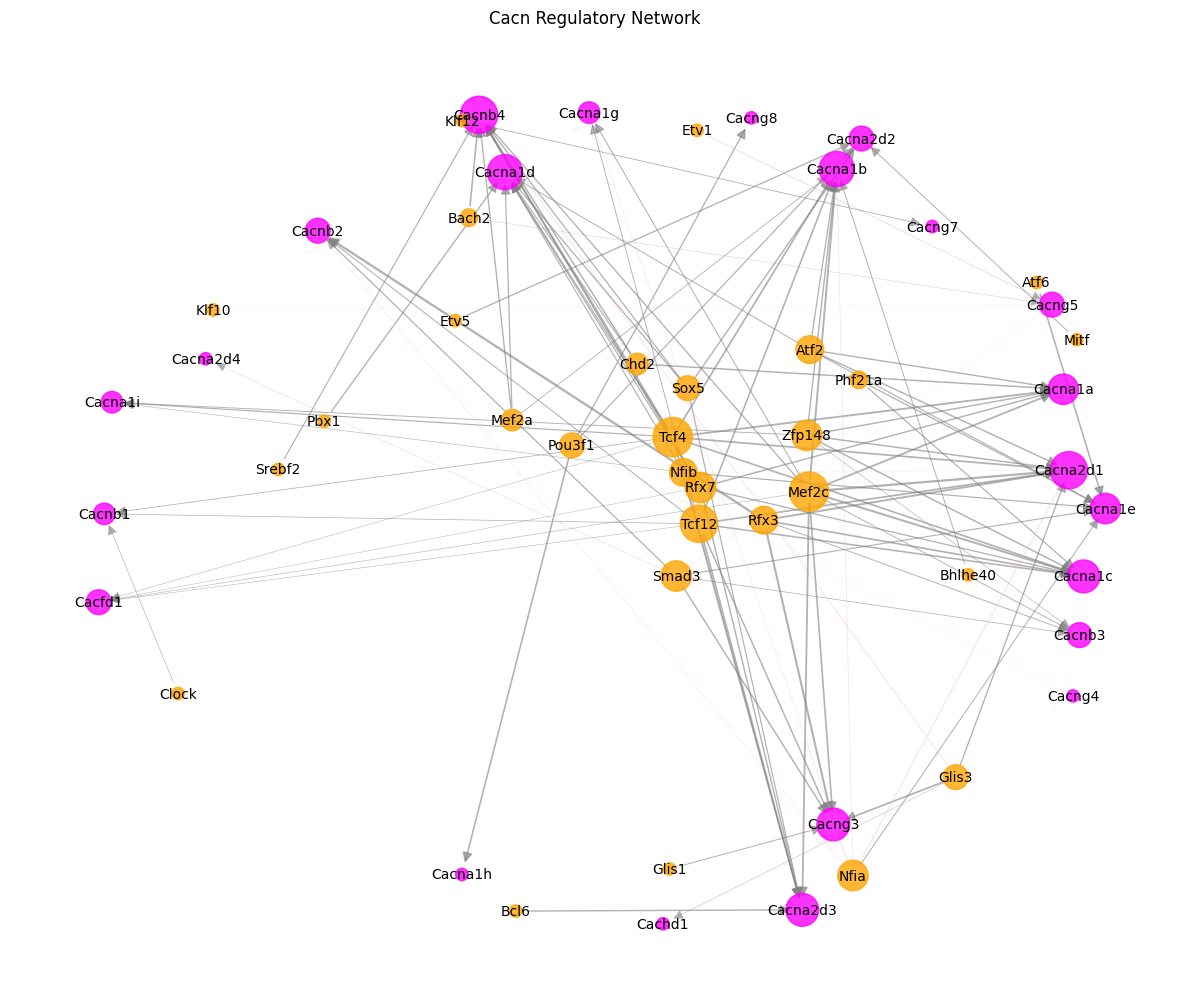

Interactive visualization saved to figures/ca_network.html


In [31]:

def visualize_regulatory_network(metadata_df, importance_col='importance', weight_col='importance_TF2G',
                               top_n=100, output_html='figures/network.html',title='SCENIC+ Regulatory Network'):
    """
    Visualize SCENIC+ regulatory network with TF-gene relationships
    
    Parameters:
        metadata_df: DataFrame with columns ['TF', 'gene', importance_col, 'region']
        importance_col: Column name for TF-gene importance scores
        top_n: Number of top interactions to visualize
        output_html: Output file name for interactive visualization
    """
    # Prepare data
    # Sort by the absolute importance and select top_n interactions

    df = metadata_df.sort_values(importance_col, ascending=False).head(top_n)
    #df = metadata_df.sort_values(importance_col, ascending=False)
    
    # Create network graph
    G = nx.DiGraph()
    
    # Add nodes and edges with importance as weight
    for _, row in df.iterrows():
        G.add_edge(row['TF'], row['Gene'], 
                  weight=row[weight_col],
                  title=f"Importance: {row[weight_col]:.2f}")
        
    degrees = dict(G.degree())
    max_degree = max(degrees.values()) if degrees else 1

    
    # Node colors (TFs in red, genes in blue)
    node_colors = {
        node: 'orange' if node in df['TF'].unique() else 'magenta'
        for node in G.nodes()
    }
    
    # Static visualization
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G, k=0.5, iterations=50)
    
    # Draw nodes

    node_sizes = [degrees[n] * 800 / max_degree for n in G.nodes()]

    nx.draw_networkx_nodes(G, pos, node_color=[node_colors[n] for n in G.nodes()],
                          node_size=node_sizes, alpha=0.8)

    # Draw edges with width proportional to importance
    edge_widths = [d['weight']*2 for u, v, d in G.edges(data=True)]
    # nx.draw_networkx_edges(G, pos, width=edge_widths, 
    #                       edge_color='gray', alpha=0.6, 
    #                       arrowstyle='-|>', arrowsize=15)
    for u, v, d in G.edges(data=True):
        arrowstyle = '-|>' if d['weight'] >= 0 else '-['
        color = 'gray' if d['weight'] >= 0 else 'pink'
        nx.draw_networkx_edges(
            G, pos, edgelist=[(u, v)],
            width=abs(d['weight'])*2,
            edge_color=color,
            alpha=0.6,
            arrowstyle=arrowstyle,
            arrowsize=15
        )

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_html+".png", dpi=300)
    plt.show()
    
    # Interactive visualization
    net = Network(height='800px', width='100%', directed=True)
    net.from_nx(G)
    
    # Set node colors and sizes
    # for node in net.nodes:
    #     node['color'] = 'red' if node['label'] in df['TF'].unique() else 'blue'
    #     node['size'] = 20 if node['label'] in df['TF'].unique() else 15
    

    # for edge in net.edges:
    #     weight = G.edges[edge['from'], edge['to']]['weight']
    #     if weight >= 0:
    #         edge['color'] = {'color': 'green', 'highlight': 'lime'}
    #         edge['arrows'] = 'to'
    #     else:
    #         edge['color'] = {'color': 'lightblue', 'highlight': 'lightblue'}  # Changed to lightblue
    #         edge['arrows'] = 'to'
    #         edge['dashes'] = True

    # Save interactive version
    net.show_buttons(filter_=['physics'])
    net.save_graph(output_html)
    print(f"Interactive visualization saved to {output_html}")

# Example usage with test data
# if __name__ == "__main__":
    # Create test data matching SCENIC+ format
test_data = {
    'TF': ['TF1', 'TF1', 'TF2', 'TF2', 'TF3', 'TF3'],
    'gene': ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE', 'GeneF'],
    'importance': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4],
    'region': ['chr1:100-200', 'chr1:300-400', 'chr2:100-200', 
                'chr3:100-200', 'chr4:100-200', 'chr5:100-200']
}
ca_df = direct_er[direct_er.Gene.isin(ca_genes)].copy()
visualize_regulatory_network(ca_df,importance_col='importance_TF2G',weight_col='rho_TF2G', top_n=300,title='Cacn Regulatory Network',output_html='figures/ca_network.html')


In [13]:
set(ca_df.TF)

{'Atf2',
 'Atf6',
 'Bach2',
 'Bcl6',
 'Bhlhe40',
 'Chd2',
 'Clock',
 'Etv1',
 'Etv5',
 'Glis1',
 'Glis3',
 'Klf10',
 'Klf12',
 'Mef2a',
 'Mef2c',
 'Mitf',
 'Nfia',
 'Nfib',
 'Pbx1',
 'Phf21a',
 'Pou3f1',
 'Rfx3',
 'Rfx7',
 'Smad3',
 'Sox5',
 'Srebf2',
 'Tcf12',
 'Tcf4',
 'Zfp148'}

In [21]:
ca_df

,Region,Gene,importance_R2G,rho_R2G,importance_x_rho,importance_x_abs_rho,TF,is_extended,eRegulon_name,Gene_signature_name,Region_signature_name,importance_TF2G,regulation,rho_TF2G,triplet_rank
13817,chr7:122649245-122649746,Cacng3,0.014728,0.632297,0.009313,0.009313,Rfx3,False,Rfx3_direct_+/+,Rfx3_direct_+/+_(1219g),Rfx3_direct_+/+_(1662r),23.846515,1,0.748749,251
12895,chr7:122905972-122906473,Cacng3,0.038753,0.663118,0.025698,0.025698,Rfx3,False,Rfx3_direct_+/+,Rfx3_direct_+/+_(1219g),Rfx3_direct_+/+_(1662r),23.846515,1,0.748749,131
12826,chr7:122684385-122684886,Cacng3,0.015684,0.574652,0.009013,0.009013,Rfx3,False,Rfx3_direct_+/+,Rfx3_direct_+/+_(1219g),Rfx3_direct_+/+_(1662r),23.846515,1,0.748749,214
2988,chr7:122649245-122649746,Cacng3,0.014728,0.632297,0.009313,0.009313,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),20.473052,1,0.630271,647
2742,chr7:122577486-122577987,Cacng3,0.006904,0.281901,0.001946,0.001946,Glis3,False,Glis3_direct_+/+,Glis3_direct_+/+_(263g),Glis3_direct_+/+_(279r),20.473052,1,0.630271,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,chr7:3367420-3367921,Cacng7,0.015316,0.155644,0.002384,0.002384,Klf12,False,Klf12_direct_+/+,Klf12_direct_+/+_(246g),Klf12_direct_+/+_(381r),0.336280,1,0.307833,32202
3383,chr7:3464803-3465304,Cacng7,0.070175,0.126297,0.008863,0.008863,Klf12,False,Klf12_direct_+/+,Klf12_direct_+/+_(246g),Klf12_direct_+/+_(381r),0.336280,1,0.307833,14858
3180,chr7:3421208-3421709,Cacng7,0.067156,0.065356,0.004389,0.004389,Klf12,False,Klf12_direct_+/+,Klf12_direct_+/+_(246g),Klf12_direct_+/+_(381r),0.336280,1,0.307833,14079
3457,chr7:3420367-3420868,Cacng7,0.040242,0.077246,0.003109,0.003109,Klf12,False,Klf12_direct_+/+,Klf12_direct_+/+_(246g),Klf12_direct_+/+_(381r),0.336280,1,0.307833,29320


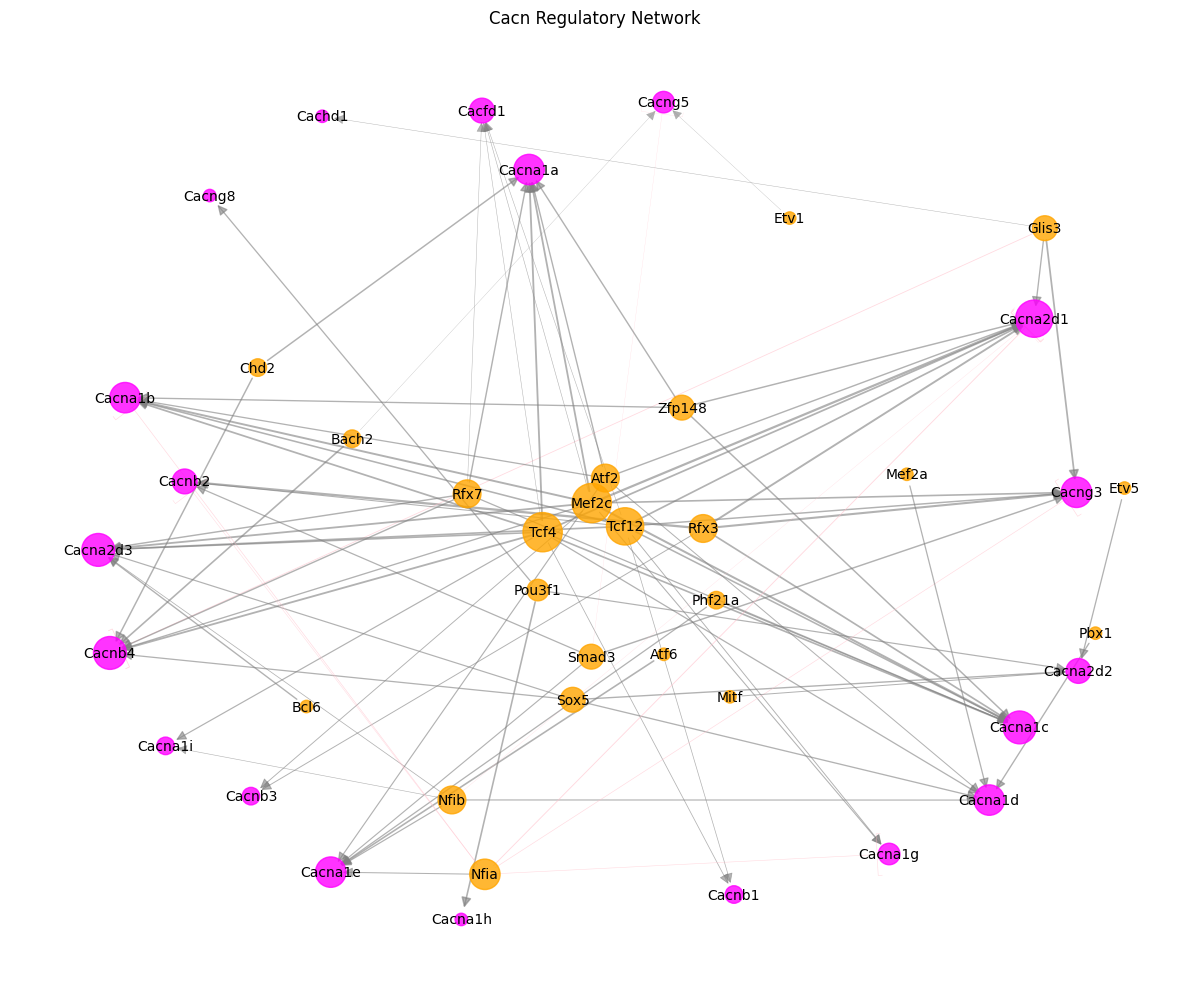

Interactive visualization saved to figures/ca_network.html


In [32]:
ca_df = direct_er[direct_er.Gene.isin(ca_genes)].copy()
visualize_regulatory_network(ca_df,importance_col='importance_TF2G',weight_col='rho_TF2G', top_n=250,title='Cacn Regulatory Network',output_html='figures/ca_network.html')


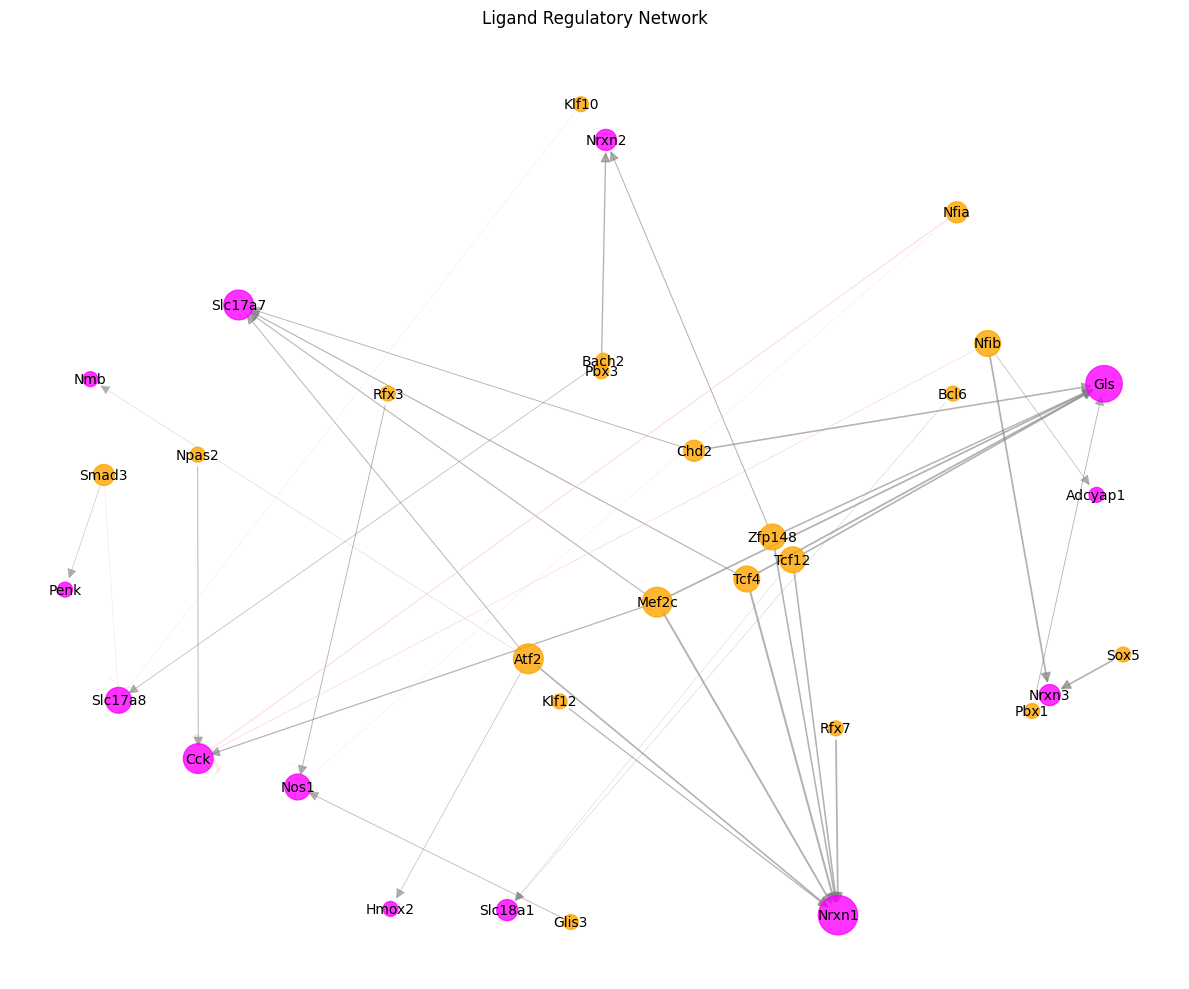

Interactive visualization saved to figures/ligand_network.html


In [30]:
ligand_df = direct_er[direct_er.Gene.isin(ligand)].copy()

visualize_regulatory_network(ligand_df,importance_col='importance_TF2G',weight_col='rho_TF2G', top_n=300,title='Ligand Regulatory Network',output_html='figures/ligand_network.html')


In [105]:
len(set(atp_df.TF))

20

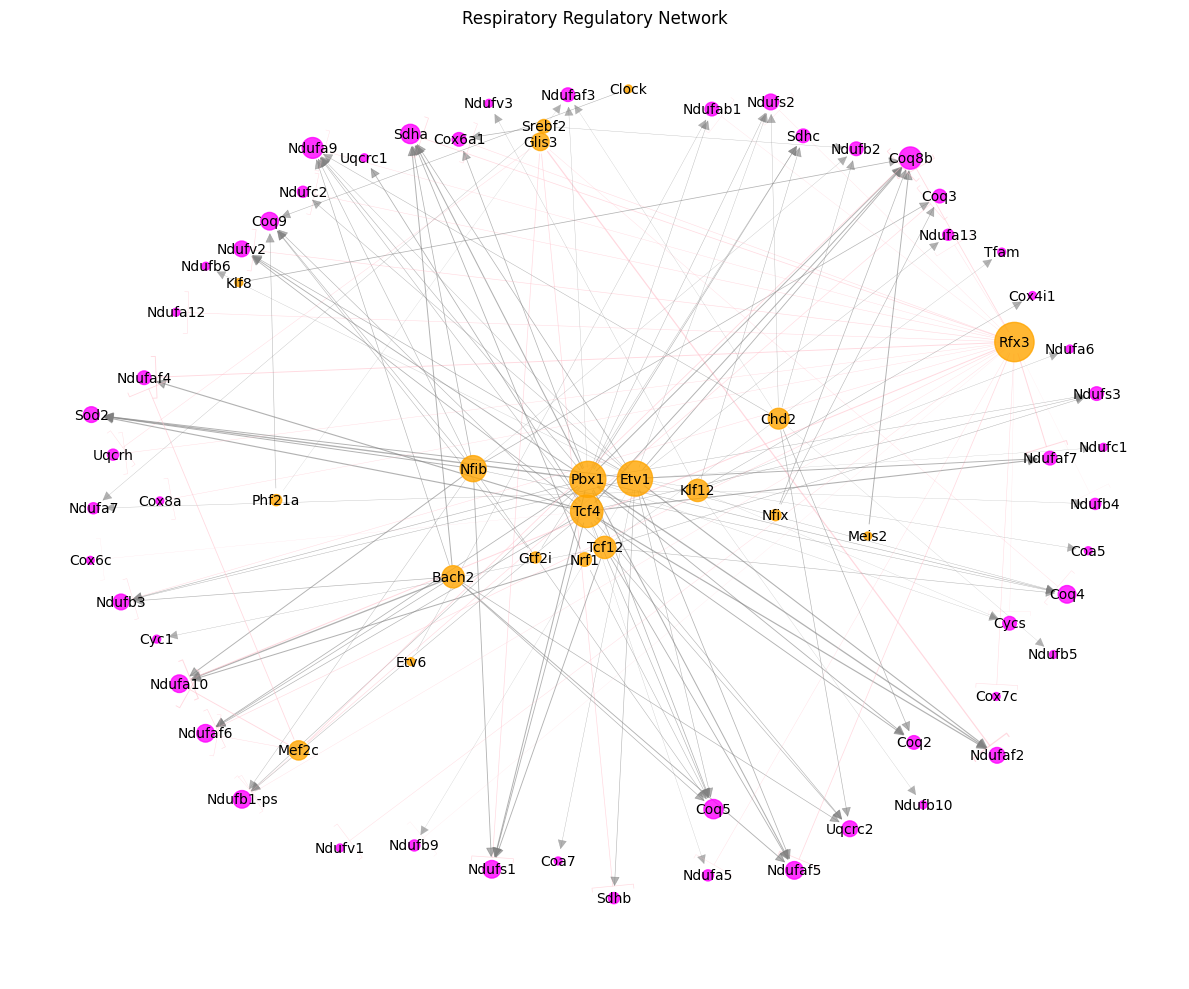

Interactive visualization saved to figures/respiratory_network.html


In [102]:
atp_df = direct_er[direct_er.Gene.isin(respriotory)].copy()

visualize_regulatory_network(atp_df,importance_col='importance_TF2G',weight_col='rho_TF2G', top_n=300,title='Respiratory Regulatory Network',output_html='figures/respiratory_network.html')


In [ ]:
receptor_df = direct_er[direct_er.Gene.isin(receptor)].copy()

visualize_regulatory_network(receptor_df,importance_col='rho_TF2G', top_n=200,title='Receptor Regulatory Network',)


In [11]:


eRegulon_gene_AUC = anndata.concat(
    [scplus_mdata["direct_gene_based_AUC"], scplus_mdata["extended_gene_based_AUC"]],
    axis = 1,
)


In [12]:
eRegulon_gene_AUC

AnnData object with n_obs × n_vars = 5792 × 188

In [ ]:
scplus_mdata.uns["direct_e_regulon_metadata"].to_csv(
    "/data1st2/junyi/output/atac0416/scenic/AMY_AMY_Glut/direct_e_regulon_metadata.csv"
)


In [ ]:
eRegulon_gene_AUC.obs = scplus_mdata.obs.loc[eRegulon_gene_AUC.obs_names]


In [ ]:
sc.pp.neighbors(eRegulon_gene_AUC, use_rep = "X")


In [ ]:
sc.tl.umap(eRegulon_gene_AUC)


In [ ]:
eRegulon_gene_AUC.obs['celltype.L2'] = eRegulon_gene_AUC.obs.index.str.split("_").str[:-1].str.join("_")

In [ ]:
sc.pl.umap(eRegulon_gene_AUC, color = ['celltype.L2'])


In [ ]:
scplus_mdata.obs['celltype.L2'] = scplus_mdata.obs.index.str.split("_").str[:-1].str.join("_")

In [ ]:
from scenicplus.RSS import (regulon_specificity_scores, plot_rss)


In [ ]:
rss = regulon_specificity_scores(
    scplus_mudata = scplus_mdata,
    variable = "celltype.L2",
    modalities = ["direct_gene_based_AUC", "extended_gene_based_AUC"]
)


In [ ]:
plot_rss(
    data_matrix = rss,
    top_n = 3,
    num_columns = 3
)

In [ ]:
from scenicplus.plotting.dotplot import heatmap_dotplot
heatmap_dotplot(
    scplus_mudata = scplus_mdata,
    color_modality = "direct_gene_based_AUC",
    size_modality = "direct_region_based_AUC",
    group_variable = "celltype.L2",
    eRegulon_metadata_key = "direct_e_regulon_metadata",
    color_feature_key = "Gene_signature_name",
    size_feature_key = "Region_signature_name",
    feature_name_key = "eRegulon_name",
    sort_data_by = "direct_gene_based_AUC",
    orientation = "horizontal",
    figsize = (16, 5)
)